In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

In [97]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PUBG Project/Solos_train.csv')
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
1,7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.00,1967,solo-fpp,96,92,-1,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
2,13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,986,4,1,49.83,1886,solo-fpp,97,94,-1,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
3,17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,0,2,1,36.00,1371,solo-fpp,96,95,1536,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
4,35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,0,1,1,22.83,1425,solo-fpp,96,94,1500,0,0.0,0,0.00,0,0,270.70,1,0,0.3474


In [98]:
# Drop fields that don't apply to solo games and are all zeroed in the solo data
print(data.DBNOs.sum())
print(data.revives.sum(), "\n")
data = data.drop(["DBNOs", "revives"], 1)
data.info()

0
0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720713 entries, 0 to 720712
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       720713 non-null  int64  
 1   Id               720713 non-null  object 
 2   groupId          720713 non-null  object 
 3   matchId          720713 non-null  object 
 4   assists          720713 non-null  int64  
 5   boosts           720713 non-null  int64  
 6   damageDealt      720713 non-null  float64
 7   headshotKills    720713 non-null  int64  
 8   heals            720713 non-null  int64  
 9   killPlace        720713 non-null  int64  
 10  killPoints       720713 non-null  int64  
 11  kills            720713 non-null  int64  
 12  killStreaks      720713 non-null  int64  
 13  longestKill      720713 non-null  float64
 14  matchDuration    720713 non-null  int64  
 15  matchType        720713 non-null  object 
 16  maxPlace         720713 non-null

In [99]:
# Obtain correlation DataFrame
corrDF = data.corr()
corrDF

,Unnamed: 0,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Unnamed: 0,1.000000,-0.000121,0.001058,-0.000094,0.000366,0.000313,0.000455,0.000396,-0.000804,-0.000752,0.000182,-0.002241,-0.000488,-0.000150,-0.000440,0.000225,-0.000070,0.000327,0.001412,0.000496,-0.000047,-0.001675,0.000373,-0.000472
assists,-0.000121,1.000000,0.121125,0.338382,0.176518,0.093047,-0.127152,0.026110,0.281692,0.140070,0.133838,-0.028279,-0.109427,-0.099006,-0.021119,0.050199,0.008518,0.012085,-0.000753,0.023298,0.101255,0.253733,0.023644,0.120039
boosts,0.001058,0.121125,1.000000,0.548780,0.394995,0.500645,-0.565516,0.012627,0.549261,0.407664,0.454404,0.047186,0.033305,0.034679,0.020028,0.291348,0.054827,0.115414,0.005530,0.075937,0.640266,0.375763,-0.001397,0.637369
damageDealt,-0.000094,0.338382,0.548780,1.000000,0.676575,0.318558,-0.691056,0.038362,0.948591,0.679217,0.610421,-0.019979,-0.070915,-0.062447,0.001452,0.139420,0.076670,0.041987,-0.003849,0.072498,0.423251,0.411896,0.011222,0.481302
headshotKills,0.000366,0.176518,0.394995,0.676575,1.000000,0.213923,-0.468139,0.020872,0.708655,0.480427,0.515684,-0.020971,-0.024320,-0.019595,0.004445,0.097929,0.023728,0.035573,-0.002493,0.043613,0.311896,0.270524,0.003498,0.337827
heals,0.000313,0.093047,0.500645,0.318558,0.213923,1.000000,-0.360608,0.001610,0.313272,0.258083,0.247310,0.082379,0.011557,0.011160,0.015148,0.228137,0.038496,0.085442,0.025007,0.052181,0.407846,0.266508,-0.004534,0.401358
killPlace,0.000455,-0.127152,-0.565516,-0.691056,-0.468139,-0.360608,1.000000,-0.012679,-0.699377,-0.798520,-0.548351,-0.003879,0.182015,0.178383,-0.021688,-0.225152,-0.068531,-0.098103,-0.015548,-0.058412,-0.604399,-0.529419,0.005236,-0.757971
killPoints,0.000396,0.026110,0.012627,0.038362,0.020872,0.001610,-0.012679,1.000000,0.036243,0.036886,0.016681,-0.073478,0.074564,0.075135,-0.977478,-0.003478,0.005619,-0.002755,-0.030635,-0.007449,0.010561,0.002985,0.984753,0.023767
kills,-0.000804,0.281692,0.549261,0.948591,0.708655,0.313272,-0.699377,0.036243,1.000000,0.717749,0.630529,-0.037057,-0.035726,-0.026406,0.001047,0.130536,0.080755,0.046094,-0.002399,0.068938,0.420645,0.406671,0.010651,0.475520
killStreaks,-0.000752,0.140070,0.407664,0.679217,0.480427,0.258083,-0.798520,0.036886,0.717749,1.000000,0.507390,-0.046034,0.035273,0.042137,-0.002587,0.106594,0.102865,0.041231,0.000047,0.040351,0.351508,0.323557,0.012773,0.447713


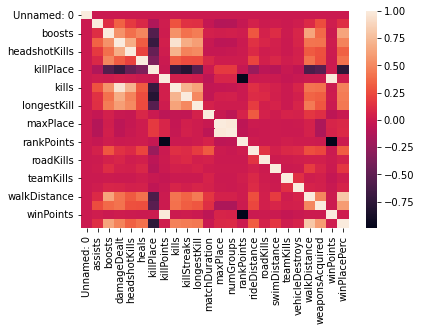

In [100]:
# Correlation heat map
dataplot = sb.heatmap(corrs)
mp.show()

In [101]:
"""
Use list of correlation DataFrame fields to build DataFrame showing collinear
fields and their correlation.
"""

# List of fields
fields = list(corrDF.columns)
# Find collinear fields
clLsts = []
for col in fields:
    collinears = []
    for row in fields:
        if abs(corrDF[col][row]) >= 0.80 and col != row: 
            collinears.append(sorted((col, row)))
    clLsts.append(collinears)
clLsts = [cl for cl in clLsts if len(cl) > 0]
# Convert to list of collinear pairs
pairLst = []
for cl in clLsts:
    for pair in cl:
        pairLst.append(tuple(pair))
# Remove duplicates and build data frame.
pairLst = list(set(pairLst))
corrPairDF = pd.DataFrame({"Field 1": [pair[0] for pair in pairLst],
                       "Field 2": [pair[1] for pair in pairLst],
                       "Correlation": [round(corrDF[pair[0]][pair[1]], 3) for pair in pairLst]})
corrPairDF


,Field 1,Field 2,Correlation
0,damageDealt,kills,0.949
1,killPoints,rankPoints,-0.977
2,killPoints,winPoints,0.985
3,rankPoints,winPoints,-0.994
4,walkDistance,winPlacePerc,0.811
5,maxPlace,numGroups,0.980
